# Importing Neccessary Libraries

In [29]:
import keras
from keras import Input
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Reading the Dataset

In [32]:
df = pd.read_csv('./train.csv')

In [33]:
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
#df = df.head(2300) removed as we have more kernels

In [34]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Converting the images into Numpy array to train the CNN

In [35]:
width = 350 #fixing image width
height = 350 #fixing image height
X = [] #this will be our numpy array
for i in tqdm(range(df.shape[0])): #for i in elements of shape
  path = './Images/'+df['Id'][i]+'.jpg' #defining imae paths. Important: images need to match
  img = image.load_img(path,target_size=(width,height,3)) #loading images with fixed size, depth 3pixel
  img = image.img_to_array(img) #converting image to numpy array
  #img = img/255 removed. using original img size without reducing it to increase precision
  X.append(img) #adding image array to the array of image arrays

X = np.array(X) #making sure that the array is numpy

100%|██████████| 7254/7254 [00:16<00:00, 436.13it/s]


In [36]:
X.shape #getting shape of the array (number of elements, width, height, depth)

(7254, 350, 350, 3)

In [37]:
y = df.drop(['Id','Genre'],axis=1) #removing first row from excel sheet as well as id and genre columns
y = y.to_numpy() #converting the rest of the sheet into numpy array
y.shape #getting the shape (number of elements, 25 elements per array)

(7254, 25)

In [38]:
#x_train = independent variables to train the model
#x_test = remaining portion not used to train, used to test the accuracy of the model
#y_train = dependent variable which need to be predicted by the model
#y_test = category labels used to test the accuracy between actual and predicted categories

#test_size = 0.1 = 10% used for testing, 90% for training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Preparing the model

In [39]:
model = Sequential()

#creating 2D layer with 16 windows, 3x(3x3)=9x9 pixels, relu = most common one, gives kind of yes or no but not 100% yes or no, input shape = input shape of first image in pixels

#model.add(keras.Input(shape=X_train[0].shape))
#model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
#pool Conv2D Layer in neural network
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#add next layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#add next layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

#puts everything in 1D array
model.add(Flatten())

#add 10dim layer to the model with relu activation (negative=0, positive = linear starting (0;0))
model.add(Dense(128,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))

#add 25dim layer to the model with sigmoid activation f(x) = 1/(1 + e^(-x))
model.add(Dense(25,activation='sigmoid'))

C:\Users\crist\Documents\GitHub\AI_Cat_Cris\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,450,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,477,689 (55.23 MB)

 Trainable params: 14,477,657 (55.23 MB)

 Non-trainable params: 32 (128.00 B)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [42]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - binary_accuracy: 0.7630 - loss: 1.3242 - val_binary_accuracy: 0.9074 - val_loss: 0.3801
Epoch 2/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - binary_accuracy: 0.8811 - loss: 0.3221 - val_binary_accuracy: 0.9075 - val_loss: 0.3153
Epoch 3/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - binary_accuracy: 0.8983 - loss: 0.2932 - val_binary_accuracy: 0.9074 - val_loss: 0.2931
Epoch 4/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - binary_accuracy: 0.9042 - loss: 0.2772 - val_binary_accuracy: 0.9072 - val_loss: 0.2880
Epoch 5/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - binary_accuracy: 0.9074 - loss: 0.2728 - val_binary_accuracy: 0.9068 - val_loss: 0.2972


In [43]:
def plotLearningCurve(history,epochs):
  #range 1 to 5
  epochRange = range(1,epochs+1)
  #defining axes
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  #title
  plt.title('Model Accuracy')
  #axe labels
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #legend
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

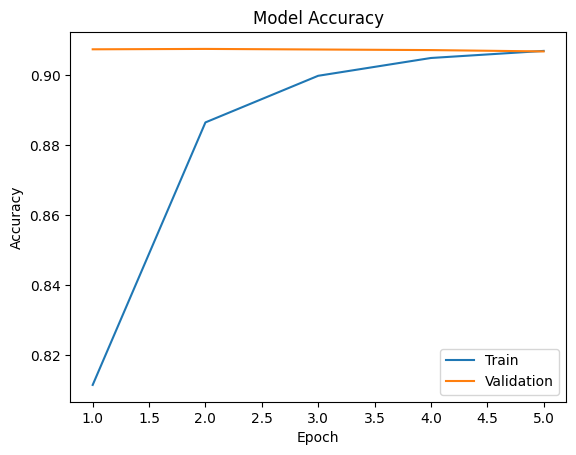

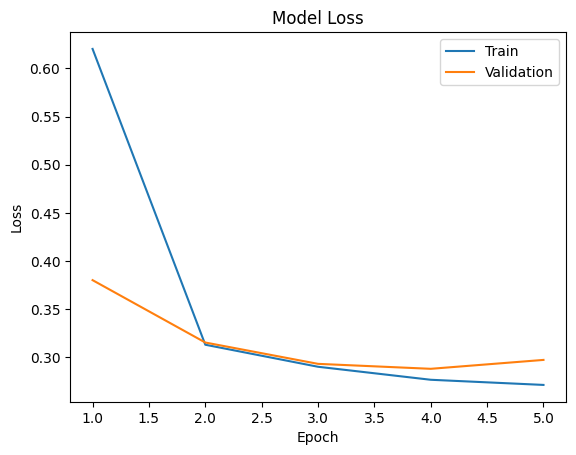

In [44]:
plotLearningCurve(history,5)

# Applying the trained model to Predict the Genre of the input image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Drama 0.50477713
Comedy 0.41151297
Romance 0.31696853


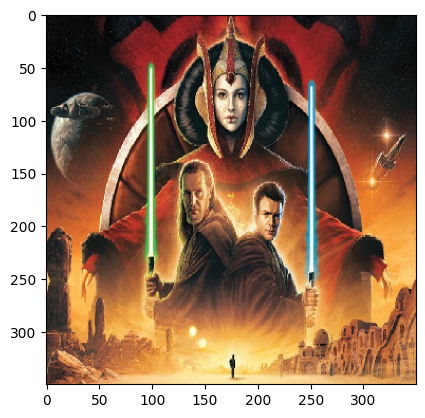

In [54]:
img = image.load_img('./star.jpg',target_size=(width,height,3))
img2 = image.load_img('./star2.jpeg',target_size=(width,height,3))
img3 = image.load_img('./star3.jpeg',target_size=(width,height,3))

img_array = [img, img2, img3]
#TODO: loop through array & get classes, add them and get the 3 most potential of it - done to increase accuracy
classes = df.columns[2:] #getting classes column

y_pred_array = []

for single_image in img_array:
  plt.imshow(single_image)
  img = image.img_to_array(single_image) #add image to array
  img = img.reshape(1, width, height, 3) #resize image
  y_pred = model.predict(img) #predict single image
  if len(y_pred_array) == 0:
    y_pred_array = y_pred #adding image prediction result to array, if array is empty: array = result
  else:
    for i in range(len(y_pred_array)):
      y_pred_array[i] += y_pred[i] #adding prediction results to array
   
for i in range(len(y_pred_array)):
  y_pred = y_pred_array[i]
  y_pred = y_pred / float(len(img_array)) #deviding array elements by number of images
  y_pred_array[i] = y_pred
      
#getting prediction result per class
top3=np.argsort(y_pred_array[0])[:-4:-1] #getting top 3 classes
for i in range(3): #for i = 0, 1, 2
  print(classes[top3[i]] + " " + str(y_pred_array[0][top3[i]])) #print top 3 classes with prediction result